# Tutorial for Pandas
**Python Data Analysis Library**
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Objection Creation
* Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

* Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [2]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [3]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.925980,0.122735,-1.379536,0.196426
2013-01-02,-1.662077,-0.652692,1.392296,-0.923867
2013-01-03,-0.324165,0.477432,-0.129288,0.114539
2013-01-04,0.459039,-0.184366,0.643161,-0.158737
2013-01-05,0.209070,1.514328,0.418641,-1.304046
2013-01-06,0.756911,0.310175,-2.459657,1.436824


In [4]:
# df = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD'))
# df

* Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


* Having specific dtypes

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

* If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [7]:
# df2.<TAB>

## Viewing Data
* See the top & bottom rows of the frame

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.925980,0.122735,-1.379536,0.196426
2013-01-02,-1.662077,-0.652692,1.392296,-0.923867
2013-01-03,-0.324165,0.477432,-0.129288,0.114539
2013-01-04,0.459039,-0.184366,0.643161,-0.158737
2013-01-05,0.209070,1.514328,0.418641,-1.304046


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.459039,-0.184366,0.643161,-0.158737
2013-01-05,0.209070,1.514328,0.418641,-1.304046
2013-01-06,0.756911,0.310175,-2.459657,1.436824


* Display the index, columns, and the underlying numpy data

In [10]:
print df.index
print df.columns
print df.values

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index([u'A', u'B', u'C', u'D'], dtype='object')
[[ 0.9259796   0.1227355  -1.3795364   0.19642629]
 [-1.66207694 -0.65269224  1.39229555 -0.92386708]
 [-0.32416539  0.4774317  -0.12928845  0.11453947]
 [ 0.45903902 -0.18436628  0.64316122 -0.15873683]
 [ 0.20906975  1.51432847  0.41864107 -1.30404627]
 [ 0.75691065  0.31017517 -2.45965669  1.4368242 ]]


* Describe shows a quick statistic summary of your data

In [11]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.060793,0.264602,-0.252397,-0.106477
std,0.951860,0.731070,1.422317,0.962019
min,-1.662077,-0.652692,-2.459657,-1.304046
25%,-0.190857,-0.107591,-1.066974,-0.732585
50%,0.334054,0.216455,0.144676,-0.022099
75%,0.682443,0.435618,0.587031,0.175955
max,0.925980,1.514328,1.392296,1.436824


* Transposing your data

In [12]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.925980,-1.662077,-0.324165,0.459039,0.209070,0.756911
B,0.122735,-0.652692,0.477432,-0.184366,1.514328,0.310175
C,-1.379536,1.392296,-0.129288,0.643161,0.418641,-2.459657
D,0.196426,-0.923867,0.114539,-0.158737,-1.304046,1.436824


* Sorting by an axis

In [13]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.196426,-1.379536,0.122735,0.925980
2013-01-02,-0.923867,1.392296,-0.652692,-1.662077
2013-01-03,0.114539,-0.129288,0.477432,-0.324165
2013-01-04,-0.158737,0.643161,-0.184366,0.459039
2013-01-05,-1.304046,0.418641,1.514328,0.209070
2013-01-06,1.436824,-2.459657,0.310175,0.756911


* Sorting by values

In [14]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-1.662077,-0.652692,1.392296,-0.923867
2013-01-04,0.459039,-0.184366,0.643161,-0.158737
2013-01-01,0.925980,0.122735,-1.379536,0.196426
2013-01-06,0.756911,0.310175,-2.459657,1.436824
2013-01-03,-0.324165,0.477432,-0.129288,0.114539
2013-01-05,0.209070,1.514328,0.418641,-1.304046


## Selection
### Getting
* See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced IndexingSelecting a single column, which yields a Series, equivalent to df.A

In [15]:
df['A']

2013-01-01    0.925980
2013-01-02   -1.662077
2013-01-03   -0.324165
2013-01-04    0.459039
2013-01-05    0.209070
2013-01-06    0.756911
Freq: D, Name: A, dtype: float64

* Selecting via [], which slices the rows.

In [16]:
df[0:3]

,A,B,C,D
2013-01-01,0.925980,0.122735,-1.379536,0.196426
2013-01-02,-1.662077,-0.652692,1.392296,-0.923867
2013-01-03,-0.324165,0.477432,-0.129288,0.114539


In [17]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.662077,-0.652692,1.392296,-0.923867
2013-01-03,-0.324165,0.477432,-0.129288,0.114539
2013-01-04,0.459039,-0.184366,0.643161,-0.158737


### Selection by Label
* For getting a cross section using a label

In [18]:
df.loc[dates[0]]

A    0.925980
B    0.122735
C   -1.379536
D    0.196426
Name: 2013-01-01 00:00:00, dtype: float64

* Selecting on a multi-axis by label

In [19]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.925980,0.122735
2013-01-02,-1.662077,-0.652692
2013-01-03,-0.324165,0.477432
2013-01-04,0.459039,-0.184366
2013-01-05,0.209070,1.514328
2013-01-06,0.756911,0.310175


* Showing label slicing, both endpoints are included

In [20]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.662077,-0.652692
2013-01-03,-0.324165,0.477432
2013-01-04,0.459039,-0.184366


* Reduction in the dimensions of the returned object

In [21]:
df.loc['20130102',['A','B']]

A   -1.662077
B   -0.652692
Name: 2013-01-02 00:00:00, dtype: float64

* For getting a scalar value

In [22]:
df.loc[dates[0],'A']

0.92597960042526328

* For getting fast access to a scalar (equiv to the prior method)

In [23]:
df.at[dates[0],'A']

0.92597960042526328

### Selection by Position
* Select via the position of the passed integers

In [24]:
df.iloc[3]

A    0.459039
B   -0.184366
C    0.643161
D   -0.158737
Name: 2013-01-04 00:00:00, dtype: float64

* By integer slices, acting similar to numpy/python

In [27]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.459039,-0.184366
2013-01-05,0.209070,1.514328


* By lists of integer position locations, similar to the numpy/python style

In [28]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.662077,1.392296
2013-01-03,-0.324165,-0.129288
2013-01-05,0.209070,0.418641


* For slicing rows explicitly

In [29]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.662077,-0.652692,1.392296,-0.923867
2013-01-03,-0.324165,0.477432,-0.129288,0.114539


* For slicing columns explicitly

In [30]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.122735,-1.379536
2013-01-02,-0.652692,1.392296
2013-01-03,0.477432,-0.129288
2013-01-04,-0.184366,0.643161
2013-01-05,1.514328,0.418641
2013-01-06,0.310175,-2.459657


* For getting a value explicitly

In [31]:
df.iloc[1,1]

-0.65269224010842297

* For getting fast access to a scalar (equiv to the prior method)

In [32]:
df.iat[1,1]

-0.65269224010842297

### Boolean Indexing
* Using a single column’s values to select data.

In [33]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.925980,0.122735,-1.379536,0.196426
2013-01-04,0.459039,-0.184366,0.643161,-0.158737
2013-01-05,0.209070,1.514328,0.418641,-1.304046
2013-01-06,0.756911,0.310175,-2.459657,1.436824


* Selecting values from a DataFrame where a boolean condition is met.

In [35]:
df[df > 0]

,A,B,C,D
2013-01-01,0.925980,0.122735,NaN,0.196426
2013-01-02,NaN,NaN,1.392296,NaN
2013-01-03,NaN,0.477432,NaN,0.114539
2013-01-04,0.459039,NaN,0.643161,NaN
2013-01-05,0.209070,1.514328,0.418641,NaN
2013-01-06,0.756911,0.310175,NaN,1.436824


* Using the isin() method for filtering:

In [36]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.925980,0.122735,-1.379536,0.196426,one
2013-01-02,-1.662077,-0.652692,1.392296,-0.923867,one
2013-01-03,-0.324165,0.477432,-0.129288,0.114539,two
2013-01-04,0.459039,-0.184366,0.643161,-0.158737,three
2013-01-05,0.209070,1.514328,0.418641,-1.304046,four
2013-01-06,0.756911,0.310175,-2.459657,1.436824,three


In [37]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.324165,0.477432,-0.129288,0.114539,two
2013-01-05,0.209070,1.514328,0.418641,-1.304046,four


### Setting
* Setting a new column automatically aligns the data by the indexes

In [38]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [39]:
df['F'] = s1

* Setting values by label

In [40]:
df.at[dates[0],'A'] = 0

* Setting values by position

In [41]:
df.iat[0,1] = 0

* Setting by assigning with a numpy array

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.379536,-5,NaN
2013-01-02,-1.662077,-0.652692,-1.392296,-5,-1.0
2013-01-03,-0.324165,-0.477432,-0.129288,-5,-2.0
2013-01-04,-0.459039,-0.184366,-0.643161,-5,-3.0
2013-01-05,-0.209070,-1.514328,-0.418641,-5,-4.0
2013-01-06,-0.756911,-0.310175,-2.459657,-5,-5.0


* The result of the prior setting operations

## Missing Data
* Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.379536,5,NaN,1.0
2013-01-02,-1.662077,-0.652692,1.392296,5,1.0,1.0
2013-01-03,-0.324165,0.477432,-0.129288,5,2.0,NaN
2013-01-04,0.459039,-0.184366,0.643161,5,3.0,NaN


* To drop any rows that have missing data.

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.662077,-0.652692,1.392296,5,1.0,1.0


* Filling missing data

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.379536,5,5.0,1.0
2013-01-02,-1.662077,-0.652692,1.392296,5,1.0,1.0
2013-01-03,-0.324165,0.477432,-0.129288,5,2.0,5.0
2013-01-04,0.459039,-0.184366,0.643161,5,3.0,5.0


* To get the boolean mask where values are nan

In [47]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
### Stats
* Operations in general exclude missing data. Performing a descriptive statistic

In [48]:
df.mean()

A   -0.093537
B    0.244146
C   -0.252397
D    5.000000
F    3.000000
dtype: float64

* Same operation on the other axis

In [49]:
df.mean(1)

2013-01-01    0.905116
2013-01-02    1.015505
2013-01-03    1.404796
2013-01-04    1.783567
2013-01-05    2.228408
2013-01-06    1.721486
Freq: D, dtype: float64

* Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [50]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s   

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.324165,-0.522568,-1.129288,4.0,1.0
2013-01-04,-2.540961,-3.184366,-2.356839,2.0,0.0
2013-01-05,-4.790930,-3.485672,-4.581359,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
* Applying functions to the data

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.379536,5,NaN
2013-01-02,-1.662077,-0.652692,0.012759,10,1.0
2013-01-03,-1.986242,-0.175261,-0.116529,15,3.0
2013-01-04,-1.527203,-0.359627,0.526632,20,6.0
2013-01-05,-1.318134,1.154702,0.945273,25,10.0
2013-01-06,-0.561223,1.464877,-1.514384,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.418988
B    2.167021
C    3.851952
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    1
2    1
3    2
4    0
5    5
6    1
7    3
8    3
9    1
dtype: int32

In [55]:
s.value_counts()

1    5
3    2
5    1
2    1
0    1
dtype: int64

### String Methods
* Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [57]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge
### Concat
* Concatenating pandas objects together with concat():

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.407255,1.589196,-0.026681,-0.269432
1,0.867460,-0.661363,-1.193589,-0.120327
2,-1.121096,-1.783118,-0.613920,0.930456
3,0.076261,-0.064316,1.824877,-0.299785
4,-0.650205,-1.556222,-1.263953,0.867054
5,0.677370,0.181016,-1.537068,0.638072
6,-0.827451,-0.063031,-0.302352,-0.499817
7,0.082707,-0.891356,-0.600001,-0.092405
8,-0.037759,-1.127408,-1.080598,-1.519203
9,-1.871167,-0.575120,0.362598,0.562863


In [59]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.407255,1.589196,-0.026681,-0.269432
1,0.867460,-0.661363,-1.193589,-0.120327
2,-1.121096,-1.783118,-0.613920,0.930456
3,0.076261,-0.064316,1.824877,-0.299785
4,-0.650205,-1.556222,-1.263953,0.867054
5,0.677370,0.181016,-1.537068,0.638072
6,-0.827451,-0.063031,-0.302352,-0.499817
7,0.082707,-0.891356,-0.600001,-0.092405
8,-0.037759,-1.127408,-1.080598,-1.519203
9,-1.871167,-0.575120,0.362598,0.562863


### Join
* SQL style merges. See the Database style joining

In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [61]:
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


* Another example that can be given is:

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [65]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [66]:
left

,key,lval
0,foo,1
1,bar,2


In [67]:
right

,key,rval
0,foo,4
1,bar,5


In [68]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append
* Append rows to a dataframe. 

In [69]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.600189,1.896496,-0.727044,-0.327082
1,-0.977538,-1.705858,-0.050110,-0.675958
2,-0.636258,-0.686071,-0.151762,-0.587719
3,0.511655,0.782745,1.739619,-0.482988
4,0.059036,-1.044086,0.348771,0.808719
5,-0.443885,0.589866,-1.337533,1.497413
6,-1.377204,-0.450980,-0.102604,-0.139318
7,-0.149353,-1.283132,-1.042113,-1.152238


In [70]:
s = df.iloc[3]

In [71]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.600189,1.896496,-0.727044,-0.327082
1,-0.977538,-1.705858,-0.050110,-0.675958
2,-0.636258,-0.686071,-0.151762,-0.587719
3,0.511655,0.782745,1.739619,-0.482988
4,0.059036,-1.044086,0.348771,0.808719
5,-0.443885,0.589866,-1.337533,1.497413
6,-1.377204,-0.450980,-0.102604,-0.139318
7,-0.149353,-1.283132,-1.042113,-1.152238
8,0.511655,0.782745,1.739619,-0.482988


### Grouping
* By “group by” we are referring to a process involving one or more of the following steps

In [72]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.249174,-0.954680
1,bar,one,-0.487917,-0.178532
2,foo,two,-0.447081,0.570012
3,bar,three,0.767342,-0.759586
4,foo,two,1.803939,0.096132
5,bar,two,1.494251,0.399126
6,foo,one,-1.254225,2.635700
7,foo,three,-0.469560,-1.182369


* Grouping and then applying a function sum to the resulting groups.

In [73]:
df.groupby('A').sum()

,C,D
A,,
bar,1.773676,-0.538992
foo,-0.117753,1.164794


* Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [74]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.487917 -0.178532
    three  0.767342 -0.759586
    two    1.494251  0.399126
foo one   -1.005052  1.681020
    three -0.469560 -1.182369
    two    1.356858  0.666144

## Reshaping
### Stack

In [75]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [76]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.067653  0.664859
      two     0.372412  0.001796
baz   one    -0.301955  0.951083
      two     1.480181 -1.040605
foo   one     0.641071 -0.248057
      two     0.918739 -0.143411
qux   one     0.563556  1.530651
      two     0.288411  0.151574

In [77]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.067653  0.664859
      two     0.372412  0.001796
baz   one    -0.301955  0.951083
      two     1.480181 -1.040605

* The stack() method “compresses” a level in the DataFrame’s columns.

In [78]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.067653
               B    0.664859
       two     A    0.372412
               B    0.001796
baz    one     A   -0.301955
               B    0.951083
       two     A    1.480181
               B   -1.040605
dtype: float64

* With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [79]:
stacked.unstack()

A         B
first second                    
bar   one     0.067653  0.664859
      two     0.372412  0.001796
baz   one    -0.301955  0.951083
      two     1.480181 -1.040605

In [80]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.067653  0.372412
      B  0.664859  0.001796
baz   A -0.301955  1.480181
      B  0.951083 -1.040605

In [81]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.067653 -0.301955
       B  0.664859  0.951083
two    A  0.372412  1.480181
       B  0.001796 -1.040605

### Pivot Tables

In [82]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.175536,1.730121
1,one,B,foo,-1.539072,0.556310
2,two,C,foo,2.358503,1.200648
3,three,A,bar,-0.287528,-0.039152
4,one,B,bar,-0.838802,-0.387281
5,one,C,bar,-1.036807,0.014758
6,two,A,foo,0.590022,-1.532831
7,three,B,foo,0.398774,0.283464
8,one,C,foo,0.025416,0.712223
9,one,A,bar,-0.559849,-0.574999


* We can produce pivot tables from this data very easily:

In [83]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.559849 -0.175536
      B -0.838802 -1.539072
      C -1.036807  0.025416
three A -0.287528       NaN
      B       NaN  0.398774
      C  1.743767       NaN
two   A       NaN  0.590022
      B  0.238843       NaN
      C       NaN  2.358503

### Time Series

In [84]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24592
Freq: 5T, dtype: int32

* Time zone representation

In [85]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.480085
2012-03-07   -1.576496
2012-03-08    1.431127
2012-03-09    0.100068
2012-03-10   -1.789037
Freq: D, dtype: float64

In [86]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.480085
2012-03-07 00:00:00+00:00   -1.576496
2012-03-08 00:00:00+00:00    1.431127
2012-03-09 00:00:00+00:00    0.100068
2012-03-10 00:00:00+00:00   -1.789037
Freq: D, dtype: float64

* Convert to another time zone

In [87]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.480085
2012-03-06 19:00:00-05:00   -1.576496
2012-03-07 19:00:00-05:00    1.431127
2012-03-08 19:00:00-05:00    0.100068
2012-03-09 19:00:00-05:00   -1.789037
Freq: D, dtype: float64

* Converting between time span representations

In [88]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.480085
2012-03-06 19:00:00-05:00   -1.576496
2012-03-07 19:00:00-05:00    1.431127
2012-03-08 19:00:00-05:00    0.100068
2012-03-09 19:00:00-05:00   -1.789037
Freq: D, dtype: float64

* Converting between time span representations

In [89]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.794414
2012-02-29   -0.512955
2012-03-31   -0.910762
2012-04-30   -1.438774
2012-05-31    1.971083
Freq: M, dtype: float64

In [90]:
ps = ts.to_period()
ps

2012-01   -0.794414
2012-02   -0.512955
2012-03   -0.910762
2012-04   -1.438774
2012-05    1.971083
Freq: M, dtype: float64

In [91]:
ps.to_timestamp()

2012-01-01   -0.794414
2012-02-01   -0.512955
2012-03-01   -0.910762
2012-04-01   -1.438774
2012-05-01    1.971083
Freq: MS, dtype: float64

* Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [92]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.536035
1990-06-01 09:00   -0.158085
1990-09-01 09:00    2.350270
1990-12-01 09:00   -0.298536
1991-03-01 09:00   -0.021486
Freq: H, dtype: float64

## Categoricals

In [93]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

* Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [94]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

* Sorting is per order in the categories, not lexical order.

In [95]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


* Grouping by a categorical column shows also empty categories.

In [96]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [97]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.head()

2000-01-01   -0.696128
2000-01-02   -0.472826
2000-01-03   -0.328297
2000-01-04   -0.405531
2000-01-05   -2.106331
Freq: D, dtype: float64

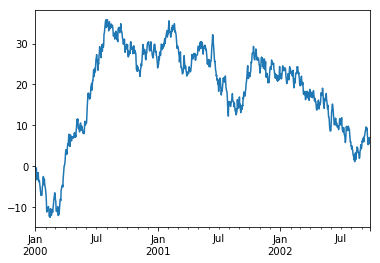

In [98]:
ts.plot()

In [99]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [100]:
df = df.cumsum()

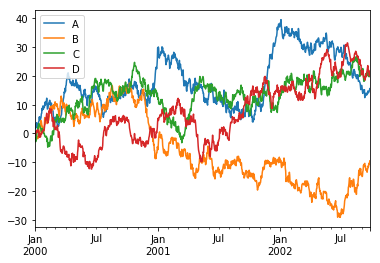

In [101]:
plt.figure()
df.plot()
plt.legend(loc='best')

## Getting Data In/Out
### CSV

In [102]:
df.to_csv('./data/foo.csv')

In [103]:
pd.read_csv('./data/foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.697300,-0.266768,-1.410356,-0.630971
1,2000-01-02,2.206420,0.574952,-2.908177,-0.243323
2,2000-01-03,3.357583,-0.554801,-1.955092,-0.005883
3,2000-01-04,3.343634,-2.218811,-2.115023,0.324676
4,2000-01-05,3.717922,-1.392618,-0.989987,0.957423


### HDF5

In [104]:
df.to_hdf('./data/foo.h5','df')

In [105]:
pd.read_hdf('./data/foo.h5','df').head()

,A,B,C,D
2000-01-01,1.697300,-0.266768,-1.410356,-0.630971
2000-01-02,2.206420,0.574952,-2.908177,-0.243323
2000-01-03,3.357583,-0.554801,-1.955092,-0.005883
2000-01-04,3.343634,-2.218811,-2.115023,0.324676
2000-01-05,3.717922,-1.392618,-0.989987,0.957423


### Excel

In [106]:
df.to_excel('./data/foo.xlsx', sheet_name='Sheet1')

In [107]:
pd.read_excel('./data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,1.697300,-0.266768,-1.410356,-0.630971
2000-01-02,2.206420,0.574952,-2.908177,-0.243323
2000-01-03,3.357583,-0.554801,-1.955092,-0.005883
2000-01-04,3.343634,-2.218811,-2.115023,0.324676
2000-01-05,3.717922,-1.392618,-0.989987,0.957423


# A little Example

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

* load data

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
print len(df_train[df_train.is_duplicate==1])
print len(df_train[df_train.is_duplicate==0])
print len(df_train)

149263
255027
404290


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


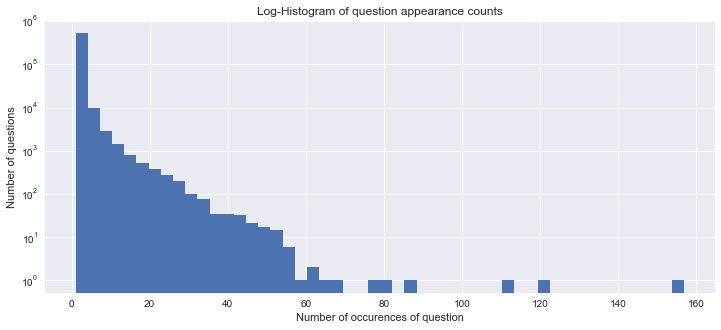

In [4]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

mean-train 59.86 std-train 31.99  max-train 1169.00 


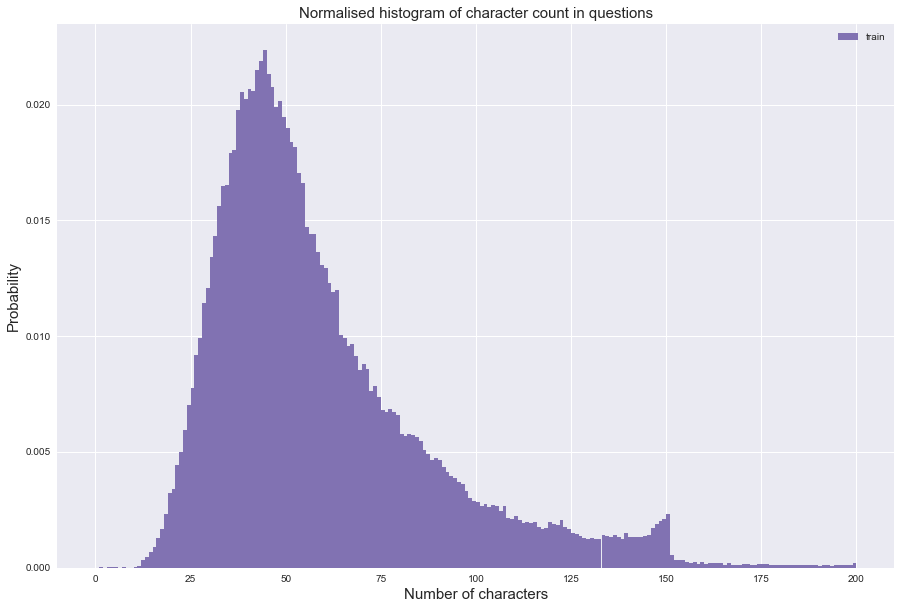

In [5]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[3], normed=True, label='train')

plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f}  max-train {:.2f} '.format(dist_train.mean(), dist_train.std(), dist_train.max()))

mean-train 11.06 std-train 5.89 max-train 237.00


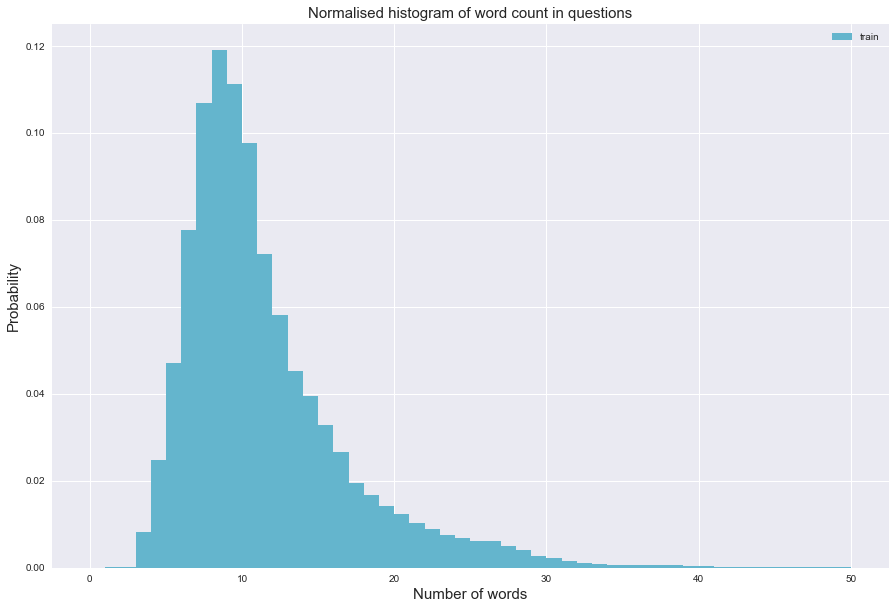

In [6]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[5], normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} max-train {:.2f}'.format(dist_train.mean(), dist_train.std(), dist_train.max()))

(-0.5, 1439.5, 1079.5, -0.5)

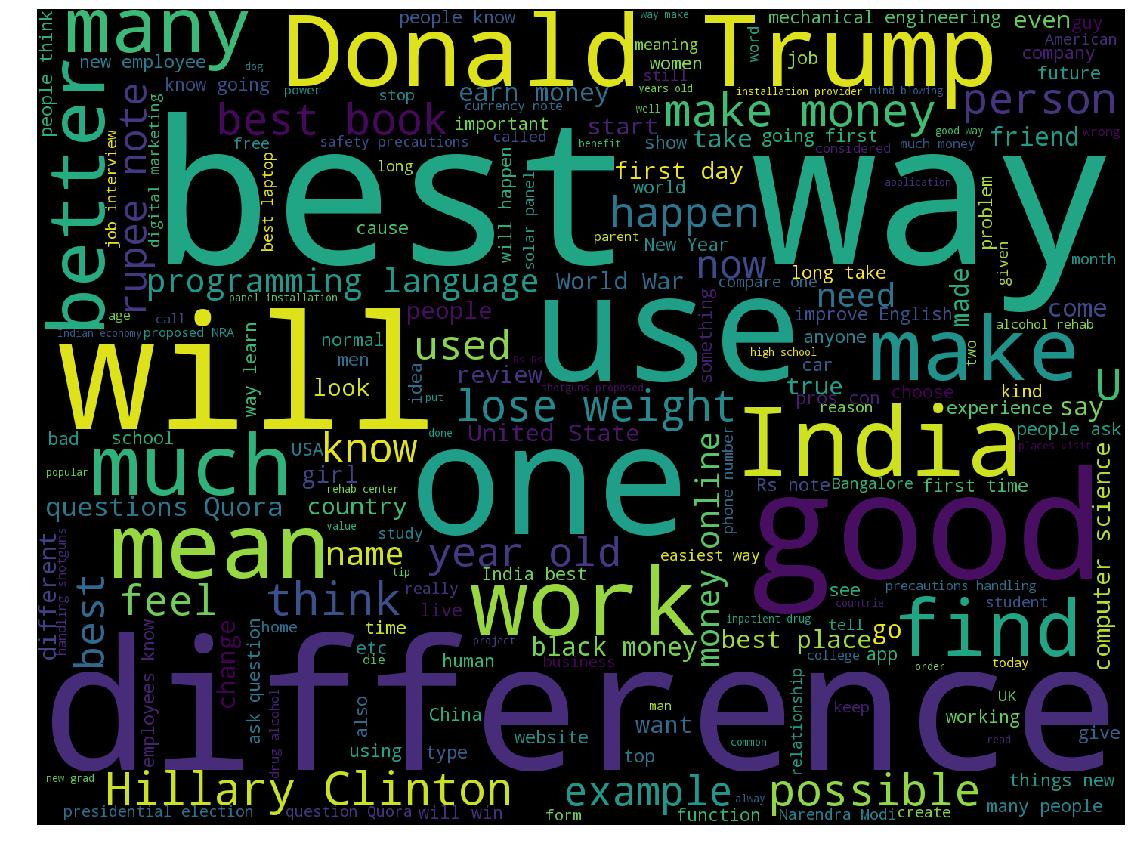

In [7]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [8]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


In [9]:
from nltk.corpus import stopwords

In [10]:
stops = set(stopwords.words("english"))
# print stops

In [11]:
def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
#     print len(shared_words_in_q1) == len(shared_words_in_q2)
    R = float(len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R
#     return len(set(q1words.keys()) & set(q2words.keys()))

train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
print train_word_match.head()

0    0.727273
1    0.307692
2    0.363636
3    0.000000
4    0.000000
dtype: float64


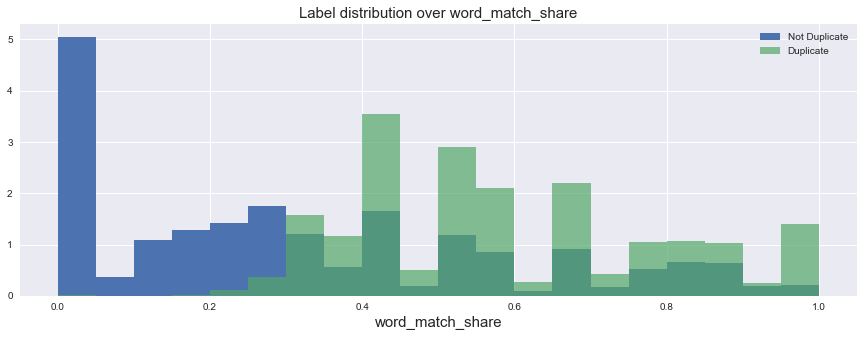

In [12]:
plt.figure(figsize=(15, 5))
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [13]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1.0 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [14]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('kernel:', 9.998000399920016e-05),
 ('chameleons', 9.998000399920016e-05),
 ('275', 9.998000399920016e-05),
 ('276', 9.998000399920016e-05),
 ('kid:', 9.998000399920016e-05),
 ('usenet', 9.998000399920016e-05),
 ('(football', 9.998000399920016e-05),
 ('sneha', 9.998000399920016e-05),
 ('population)', 9.998000399920016e-05),
 (',delhi', 9.998000399920016e-05)]

In [15]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


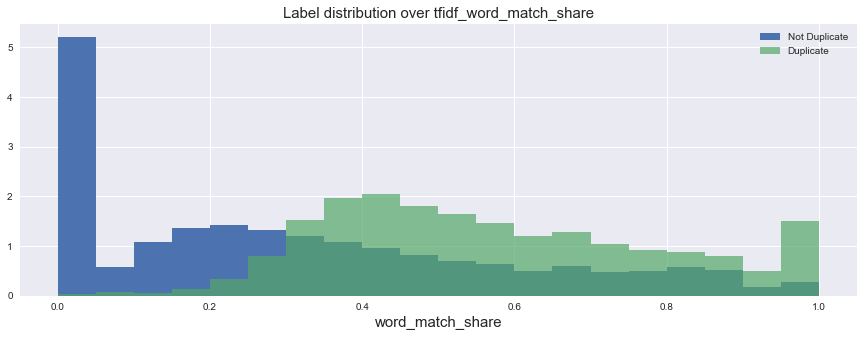

In [16]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [17]:
# from sklearn.metrics import roc_auc_score
# print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
# print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))